Your objective in this challenge is to write a program that calculates pixel coordinate values for an image that is to be displayed on a two dimensional surface given the dimensions of the image and the corner points of the image as it is to be displayed.


For example, if an image is defined by a 3x3 grid of pixel values, and the (x, y) coordinates of the four corner points to display the image at are: (1, 1), (3, 1), (1, 3), and (3, 3) then the program should calculate and return the coordinates: (1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (3, 2), (3, 1), (3, 2), (3, 3) which are the coordinates at which to place the 9 pixels in the image such that they’re evenly spaced within the corner points. The solution can be seen visually in the image below.


### Input Specifications
The program will take two inputs:

#### 1. Image dimensions
This will be a tuple defining the height and width of the image in terms of pixel counts.
For example, an input for this parameter of (10, 12) means that the image has 10 rows and 12 columns.

#### 2. Corner Points
This will be a list of two-element tuples defining the x and y coordinates of the image corner points of the displayed image. It consists of four (x, y) pairs.
The specification will follow the following example format:


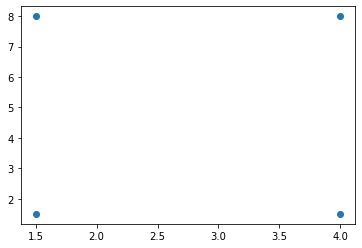

In [10]:
corner_points = [
    (1.5, 1.5),  # (x, y)
    (4.0, 1.5),  # (x, y)
    (1.5, 8.0),  # (x, y)
    (4.0, 8.0)]  # (x, y)
corner_points

# These corner points are represented visually in the plot below.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x, y = np.array(corner_points).T
plt.scatter(x,y)
plt.show()

### Output Specifications
Your program should calculate and return the x and y coordinates at which to plot each pixel in the input image such that the pixels are evenly spaced within the rectangle defined by the corner points.
The output should be of shape mxnx2 where m is the number of rows in the input image and n is the number of columns in the input image. The solution in the example at the beginning of this page would be:


In [23]:
example_corner_points = [
    (1, 1),  # (x, y)
    (3, 1),  # (x, y)
    (1, 3),  # (x, y)
    (3, 3)]  # (x, y)


solution = [
    [[1.0, 3.0], [2.0, 3.0], [3.0, 3.0]],
    [[1.0, 2.0], [2.0, 2.0], [3.0, 2.0]],
    [[1.0, 1.0], [2.0, 1.0], [3.0, 1.0]]
  ]

For example, the x coordinate of the pixel at the top left corner of the image would be accessed with solution[0, 0, 0] and the y coordinate of the pixel at the bottom right of the image would be accessed with solution[3, 3, 1].

### Assumptions & Requirements

* Your program can assume that the corner points will define a rectangle with sides that are parallel to the x and y axes (the rectangle will not be rotated)
* The corner points can be provided in any order, your program should determine which is the bottom left, top right etc.
* You aren’t allowed to develop your solution using any image processing libraries, however please feel free to use array manipulation libraries such as NumPy
* To enable us to run your program please package the application as a web service that performs that calculations in response to a POST request containing the inputs in the body of the payload. You may use external libraries (i.e, Flask).
* Additionally, please package the web service in a Docker container that can either be built locally or pulled down and run via Docker hub.
* lease submit your exercise by providing a link to a public repository (i.e., GitHub, Bitbucket) to your recruiter. The repository should include instructions for running your code

In [32]:
import numpy as np

corner_points = example_corner_points

height_max = corner_points[0][1]
height_min = corner_points[0][1]
width_max = corner_points[0][0]
width_min = corner_points[0][0]


for i in range(1,len(corner_points)):
    height_max = max(height_max, corner_points[i][1])
    height_min = min(height_min, corner_points[i][1])
    width_max = max(width_max,corner_points[i][0])
    width_min = min(width_min, corner_points[i][0])




In [35]:
complete_width = list(np.linspace(width_min, width_max,3))
complete_height = list(np.linspace(height_min,height_max,3))


[1.0, 2.0, 3.0]

In [41]:
import itertools
all_coordinates = list(itertools.product(complete_width, complete_height))
all_coordinates

[(1.0, 1.0),
 (1.0, 2.0),
 (1.0, 3.0),
 (2.0, 1.0),
 (2.0, 2.0),
 (2.0, 3.0),
 (3.0, 1.0),
 (3.0, 2.0),
 (3.0, 3.0)]

In [54]:
row_ans = list()
final_ans = list()

row_ans.append([all_coordinates[0][0], all_coordinates[0][1]])
for i in range(1,len(all_coordinates)):
    if all_coordinates[i][0] != row_ans[-1][0]:
        final_ans.append(row_ans)
        row_ans = list()
    row_ans.append([all_coordinates[i][0], all_coordinates[i][1]])
final_ans.append(row_ans)
final_ans


[[[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]],
 [[2.0, 1.0], [2.0, 2.0], [2.0, 3.0]],
 [[3.0, 1.0], [3.0, 2.0], [3.0, 3.0]]]

In [53]:
final_ans

[[[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]], [[2.0, 1.0], [2.0, 2.0], [2.0, 3.0]]]

In [72]:
import numpy as np
import itertools


def createImageMatrix(corner_points:list, image_dimensions: tuple):

    # Checks if the number of corner points is correct
    if len(corner_points ) !=4 :
        print('Wrong number of coordinates provided')
        return

    if len(image_dimensions) != 2:
        print('Wrong shape of image_dimensions')
        return

    # Initial values are set base on the first coordinates provided
    height_max = corner_points[0][1]
    height_min = corner_points[0][1]
    width_max = corner_points[0][0]
    width_min = corner_points[0][0]

    # iterate through all of the coordinates to find the outter parameters of the image
    for i in range(1,len(corner_points)):
        height_max = max(height_max, corner_points[i][1])
        height_min = min(height_min, corner_points[i][1])
        width_max = max(width_max,corner_points[i][0])
        width_min = min(width_min, corner_points[i][0])


    # Generate a evenly distributed line of numbers based on the 
    # min and max values, and the number of points desire in between
    complete_width = list(np.linspace(width_min, width_max, image_dimensions[0]))
    complete_height = list(np.linspace(height_min,height_max, image_dimensions[1]))

    # Create a list of all possible coordinates 
    all_coordinates = list(itertools.product(complete_width, complete_height))

    # initialize lists
    row_ans = list()
    final_ans = list()

    # append the first entry from the list of coordinates
    row_ans.append([all_coordinates[0][0], all_coordinates[0][1]])
    for i in range(1,len(all_coordinates)):

        # if a new row is detected, add the current row of coordinates to the final
        # answer and reset the row
        if all_coordinates[i][0] != row_ans[-1][0]:
            final_ans.append(row_ans)
            row_ans = list()
        
        # add the pair of coordinates to the row
        row_ans.append([all_coordinates[i][0], all_coordinates[i][1]])
    
    # add the row to the final answer
    final_ans.append(row_ans)
    return final_ans




In [76]:

image_dimensions = (3, 3)

corner_points = [
    (1, 1),  # (x, y)
    (3, 1),  # (x, y)
    (1, 3),  # (x, y)
    (3, 3)   # (x, y)
    ]

createImageMatrix(corner_points, image_dimensions)

[[[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]],
 [[2.0, 1.0], [2.0, 2.0], [2.0, 3.0]],
 [[3.0, 1.0], [3.0, 2.0], [3.0, 3.0]]]